# Electron spin

Electrons have an internal angular momentum referred to as spin and which external as well as internal magnetic fields in molecular systems, where the latter originate from other charged particles (electrons and nuclei) in relative motion. The spatial  distribution of the electron spin will accommodate itself to these magnetic fields and in general be inhomogeneous.

## Single-electron systems

When speaking about the spin of an electron at position $\mathbf{r}$ in space, we refer to expectation values of spin operators for electronic wave functions at the said position. The three canonical spin operators for a one-electron system are written in terms of the [Pauli matrices](https://en.wikipedia.org/wiki/Pauli_matrices)

$$
\hat{s}_x = 
\frac{\hbar}{2}
\begin{pmatrix}
0 & 1 \\ 1 & 0
\end{pmatrix}; \qquad
\hat{s}_y = 
\frac{\hbar}{2}
\begin{pmatrix}
0 & -i \\ i & 0
\end{pmatrix}; \qquad
\hat{s}_z = 
\frac{\hbar}{2}
\begin{pmatrix}
1 & 0 \\ 0 & 1
\end{pmatrix}
$$

with a cyclic commutation relation written in terms of the [Levi-Civita symbol](https://en.wikipedia.org/wiki/Levi-Civita_symbol)

$$
[\hat{s}_\alpha, \hat{s}_\beta] = i \hbar \hat{s}_\gamma \varepsilon_{\alpha\beta\gamma}
$$

Other derived spin operators include the total spin operator 

$$
\hat{s}^2 = \hat{s}_x^2 + \hat{s}_y^2 + \hat{s}_z^2 = \frac{3 \hbar^2}{4} \hat{I}
$$

and the ladder operators

$$
\hat{s}_\pm = \hat{s}_x \pm i \hat{s}_y
$$

Due to spin–orbit interactions the $2p_{1/2}$ and $2p_{3/2}$ levels in the hydrogen atom show a [fine-structure splitting](https://en.wikipedia.org/wiki/Fine_structure). Let us study the wave functions associated with the $m_j = 1/2$ and $m_j = 3/2$ components of these respective levels that are given by

$$
\psi_{j, m_j}(\mathbf{r}) = R_{2,1}(r) \mathcal{Y}_{j,m_j}(\theta, \phi)
$$

with the [spinor spherical harmonics](https://handwiki.org/wiki/Spin_spherical_harmonicshttps://handwiki.org/wiki/Spin_spherical_harmonics) are expressed in the regular spherical harmonics as

$$
\mathcal{Y}_{1/2,1/2}(\theta, \phi) = 
\frac{1}{\sqrt{3}}
\begin{pmatrix}
- Y_1^0 \\ \sqrt{2} Y_1^1
\end{pmatrix} ; \qquad
%
\mathcal{Y}_{3/2,3/2}(\theta, \phi) = 
\begin{pmatrix}
Y_1^1 \\ 0
\end{pmatrix}
$$

The components of the spin density are equal to

$$
\langle \hat{s}_\alpha \rangle(\mathbf{r}) = 
r^2 | R_{2,1}(r) |^2 \langle \mathcal{Y}_{j,m_j} | \hat{s}_\alpha | \mathcal{Y}_{j,m_j} \rangle
$$

We plot this vector field in the $xz$-plane where $\phi = 0$ (overall normalization factors are left out).

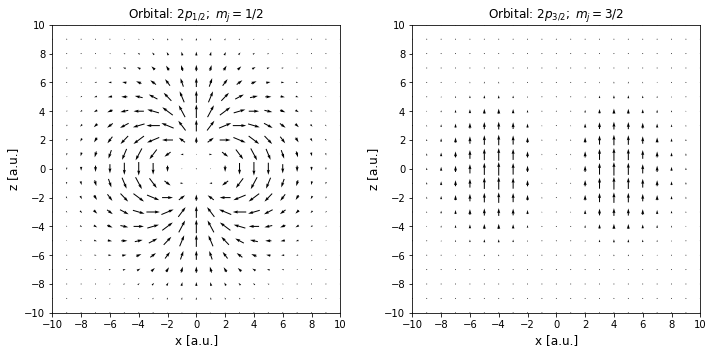

In [46]:
import matplotlib.pyplot as plt
import numpy as np

n = 21
m = 11
x = np.linspace(-10, 10, n)
z = np.linspace(-10, 10, n)
(X, Z) = np.meshgrid(x, z)

theta = np.zeros((n, n))
theta[m:, m:] = np.arctan(X[m:, m:] / Z[m:, m:])
theta[m:, : m - 1] = np.arctan(X[m:, : m - 1] / Z[m:, : m - 1])
theta[: m - 1, : m - 1] = np.arctan(X[: m - 1, : m - 1] / Z[: m - 1, : m - 1]) - np.pi
theta[: m - 1, m:] = np.arctan(X[: m - 1, m:] / Z[: m - 1, m:]) + np.pi
theta[m - 1, m:] = np.pi / 2
theta[m - 1, : m - 1] = -np.pi / 2

# rho = r**2 * |R_{2,1}|**2
r = np.sqrt(X**2 + Z**2)
rho = r**4 * np.exp(-r)

u = np.sin(2 * theta) * rho
v = np.cos(2 * theta) * rho

fig1 = plt.figure(1, figsize=(10, 5))
h1 = plt.axes([0.1, 0.1, 0.4, 0.8], frame_on=True)
plt.quiver(x, z, u, v, color="k", units="xy", pivot="mid", scale=5, width=0.07)
plt.xlabel("x [a.u.]", size=12)
plt.ylabel("z [a.u.]", size=12)
plt.setp(
    h1,
    xlim=(-9.5, 9.5),
    ylim=(-9.5, 9.5),
    xticks=range(-10, 11, 2),
    yticks=range(-10, 11, 2),
)
plt.title(r"Orbital: $2p_{1/2};\; m_j=1/2$", color="k", size=12)

u = 0.0 * rho
v = np.sin(theta) ** 2 * rho

h2 = plt.axes([0.6, 0.1, 0.4, 0.8], frame_on=True)
q2 = plt.quiver(x, z, u, v, color="k", units="xy", pivot="mid", scale=5, width=0.07)
plt.xlabel("x [a.u.]", size=12)
plt.ylabel("z [a.u.]", size=12)
plt.setp(
    h2,
    xlim=(-9.5, 9.5),
    ylim=(-9.5, 9.5),
    xticks=range(-10, 11, 2),
    yticks=range(-10, 11, 2),
)
plt.title(r"Orbital: $2p_{3/2};\; m_j=3/2$", color="k", size=12)

plt.show()

It is clearly seen that the spin in the upper $2p_{3/2}$ level is collinear whereas it is more complex and noncollinear in the lower $2p_{1/2}$ level.

## Many-electron systems

For a many-electron system, the Cartesian spin operators take the form

$$
\hat{S}_\alpha = \sum_{i=1}^N \hat{s}_\alpha(i)
$$

with ladder operators

$$
\hat{S}_\pm = \sum_{i=1}^N \hat{s}_\pm(i)
$$

and the total spin operator is a two-electron operator equal to

$$
\hat{S}^2 = \hat{S}_x^2 + \hat{S}_y^2 + \hat{S}_z^2
$$

The commutator relation takes the same form as in the one-electron case

$$
[\hat{S}_\alpha, \hat{S}_\beta] = i \hbar \hat{S}_\gamma \varepsilon_{\alpha\beta\gamma}
$$

which enables us to derive the alternative expressions for the total spin operator

\begin{align*}
\hat{S}^2 & = 
\hat{S}_-\hat{S}_+ + \hat{S}_z^2 + \hbar \hat{S}_z \\
\hat{S}^2 & = 
\hat{S}_+\hat{S}_- + \hat{S}_z^2 - \hbar \hat{S}_z \\
\end{align*}

When the Hamiltonian is spin-independent, there exist common eigenstates to the set of commuting operators $\hat{H}$, $\hat{S}^2$, and $\hat{S}_z$:

\begin{align*}
\hat{H} | \Psi \rangle & = E | \Psi \rangle \\
\hat{S}^2 | \Psi \rangle & = S(S+1) \hbar^2 | \Psi \rangle, \quad S = 0, \frac{1}{2}, 1, \frac{3}{2}, \ldots \\
\hat{S}_z | \Psi \rangle & = M_S \hbar | \Psi \rangle , \quad M_s = -S, -S + 1, \ldots, S
\end{align*}

States with $S = 0, \frac{1}{2}, 1$ are referred to as singlets, doublets, and triplets, respectively, associated with energy degeneracy with respect to the $M_S$ quantum number. While we in practice are unable to find the exact eigenstates of the Hamiltonian, it is straightforward to form spin-adapted linear combinations of Slater determinants that are exact eigenstates of the spin operators.

### Spin and Slater determinants

#### All determinants

All Slater determinants are eigenfunctions of $\hat{S}_z$ and the associated quantum number is equal to

$$
M_s = \frac{1}{2} ( N^\alpha - N^\beta )
$$

where $N^\alpha$ and $N^\beta$ refer to the number of occupied $\alpha$- and $\beta$-spin orbitals. In particular, all closed-shell states have zero projection of the spin angular momentum along the $z$-axis.

#### High-spin states

All high-spin determinants are eigenfunctions of both $\hat{S}_z$ and $\hat{S}^2$. The quantum number associated with the total spin operators is in this case equal to

$$
S = \frac{|N^\alpha - N^\beta|}{2}
$$